In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import datasets
from sklearn import preprocessing

In [3]:
iris = datasets.load_iris()
x = iris.data

In [4]:
import pickle

In [5]:
with open('ard-ppca.pkl', 'rb') as fh:
    model = pickle.load(fh)

In [7]:
N, D = x.shape
data = {
    'N': N,
    'D': D,
    'M': 10,
    'x': x
}

In [8]:
v = model.vb(data)

In [9]:
df = pd.read_csv(v['args']['sample_file'].decode('ascii'), comment='#').dropna()
sdf = df.mean()

/Users/vale/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
def extract_alpha(sdf):
    v_a = sdf[sdf.index.str.startswith('alpha.')]
    v_a.index = v_a.index.str.extract('alpha\.(\d+)', expand=False).map(int)

    return v_a

In [11]:
v_a = extract_alpha(sdf)

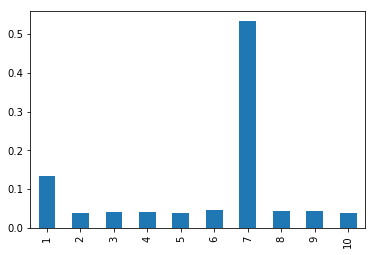

In [12]:
(v_a / v_a.sum()).plot(kind='bar');

In [13]:
def extract_z(sdf):
    v_z = sdf[sdf.index.str.startswith('z.')]
    v_Z = v_z.to_frame('value')
    v_Z_info = v_Z.index.to_series().str.extract('z\.(?P<dim>\d+)\.(?P<sample>\d+)', expand=False).applymap(int)
    v_Z_all = v_Z.join(v_Z_info)
    z = v_Z_all.pivot_table('value', 'sample', 'dim')
    
    return z

In [14]:
z = extract_z(sdf)

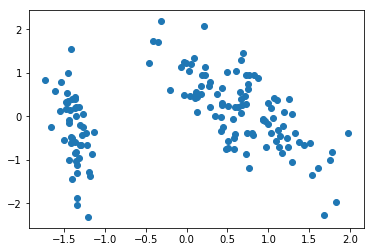

In [15]:
i1 = v_a.sort_values().index[-1]
i2 = v_a.sort_values().index[-2]
plt.scatter(z[i1], z[i2]);

In [17]:
batch = np.random.binomial(1, 0.5, (x.shape[0], 1))
effect = np.random.normal(2.0, 0.5, size=x.shape)
x_b = x + batch * effect

In [18]:
N, D = x.shape
data = {
    'N': N,
    'D': D,
    'M': 10,
    'x': x_b
}

In [19]:
v = model.vb(data)

In [20]:
df = pd.read_csv(v['args']['sample_file'].decode('ascii'), comment='#').dropna()
sdf = df.mean()

/Users/vale/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
alpha = extract_alpha(sdf)
z = extract_z(sdf)

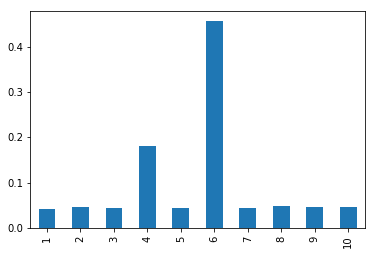

In [22]:
(alpha / alpha.sum()).plot(kind='bar');

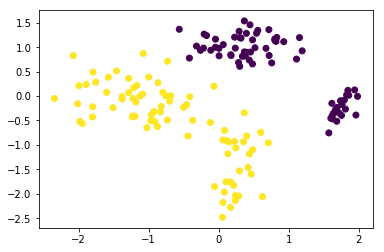

In [23]:
i1 = alpha.sort_values().index[-1]
i2 = alpha.sort_values().index[-2]
plt.scatter(z[i1], z[i2], c=batch);

In [24]:
with open('ard-prca.pkl', 'rb') as fh:
    prca = pickle.load(fh)

In [25]:
def extract_beta(sdf):
    v_a = sdf[sdf.index.str.startswith('beta.')]
    v_a.index = v_a.index.str.extract('beta\.(\d+)', expand=False).map(int)

    return v_a

In [27]:
N, D = x.shape
data = {
    'N': N,
    'D': D,
    'M': 10,
    'x': x_b,
    'P': 1,
    'y': batch.T,
}

In [28]:
v = prca.vb(data)

In [29]:
df = pd.read_csv(v['args']['sample_file'].decode('ascii'), comment='#').dropna()
sdf = df.mean()

/Users/vale/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
alpha = extract_alpha(sdf)
beta = extract_beta(sdf)
z = extract_z(sdf)

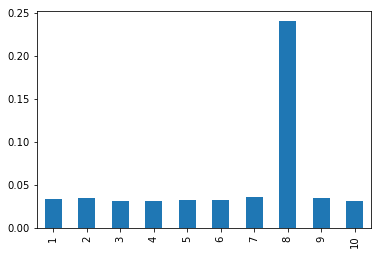

In [31]:
(alpha / (alpha.sum() + beta.sum())).plot(kind='bar');

In [32]:
beta / (alpha.sum() + beta.sum())

1    0.460001
dtype: float64

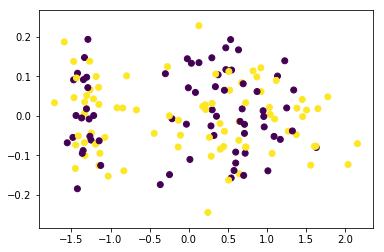

In [33]:
i1 = alpha.sort_values().index[-1]
i2 = alpha.sort_values().index[-2]
plt.scatter(z[i1], z[i2], c=batch);